In [1]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the data
orders = pd.read_csv("orders.csv")
order_details = pd.read_csv("order_details.csv")
pizza_types = pd.read_csv("pizza_types.csv", encoding= 'unicode_escape')
pizzas = pd.read_csv("pizzas.csv", encoding= 'unicode_escape')

## Merge the data into one dataframe

In [3]:
new_df = pd.merge(orders, order_details, how='outer')

In [4]:
new_df_pizza = pd.merge(pizzas, pizza_types, how='outer')

In [5]:
df = pd.merge(new_df, new_df_pizza, how='outer')

In [6]:
df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1.0,2015-01-01,11:38:36,1.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77.0,2015-01-02,12:22:46,179.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146.0,2015-01-03,14:22:10,357.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163.0,2015-01-03,16:54:54,389.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247.0,2015-01-04,20:55:29,568.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48625 entries, 0 to 48624
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  float64
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  float64
 4   pizza_id          48625 non-null  object 
 5   quantity          48620 non-null  float64
 6   pizza_type_id     48625 non-null  object 
 7   size              48625 non-null  object 
 8   price             48625 non-null  float64
 9   name              48625 non-null  object 
 10  category          48625 non-null  object 
 11  ingredients       48625 non-null  object 
dtypes: float64(4), object(8)
memory usage: 4.8+ MB


In [63]:
df.describe()

,order_id,order_details_id,quantity,price,week,hour,month,price_per_unit
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.0,48620.000000,48620.000000,48620.000000
mean,10701.479761,24310.500000,1.019622,16.494132,26.633875,15.911806,6.451131,16.333471
std,6180.119770,14035.529381,0.143077,3.621789,14.986635,3.149836,3.435420,3.767365
min,1.000000,1.000000,1.000000,9.750000,1.0,9.000000,1.000000,3.000000
25%,5337.000000,12155.750000,1.000000,12.750000,14.0,13.000000,3.000000,12.500000
50%,10682.500000,24310.500000,1.000000,16.500000,26.0,16.000000,6.000000,16.500000
75%,16100.000000,36465.250000,1.000000,20.250000,40.0,18.000000,9.000000,20.250000
max,21350.000000,48620.000000,4.000000,35.950000,53.0,23.000000,12.000000,35.950000


In [9]:
# drop null values
df = df.dropna()

In [11]:
# confirm no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  float64
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  float64
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  float64
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(4), object(8)
memory usage: 4.8+ MB


# Get the data to the correct data types

In [12]:
# change to int
df.order_id = df.order_id.astype(int)
df.order_details_id = df.order_details_id.astype(int)
df.quantity = df.quantity.astype(int)

In [13]:
# change column from object to date
df.date = pd.to_datetime(df.date)

In [14]:
df["week"] = df["date"].dt.isocalendar().week

In [15]:
df.category = df.category.astype('category')

In [16]:
df['size'] = df['size'].astype('category')

In [17]:
size_mapping = {
    'L': 'Large',
    'M': 'Medium',
    'S': 'Small',
    'XL': 'Extra Large',
    'XXL': 'Extra Extra Large'
}

# Replace size codes with labels
df['size'] = df['size'].replace(size_mapping)

In [23]:
# add a column for day of the week
df["day"] = df["date"].dt.day_name()

In [24]:
# change column time from object to datetime
df.time = pd.to_datetime(df.time)

In [26]:
# add a column to get the time in hours
df["hour"] = df["time"].dt.hour

In [27]:
df['month'] = df['date'].dt.month

In [28]:
df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,week,day,hour,month
0,1,2015-01-01,2023-08-09 11:38:36,1,hawaiian_m,1,hawaiian,Medium,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,Thursday,11,1
1,77,2015-01-02,2023-08-09 12:22:46,179,hawaiian_m,1,hawaiian,Medium,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,Friday,12,1
2,146,2015-01-03,2023-08-09 14:22:10,357,hawaiian_m,1,hawaiian,Medium,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,Saturday,14,1
3,163,2015-01-03,2023-08-09 16:54:54,389,hawaiian_m,1,hawaiian,Medium,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,Saturday,16,1
4,247,2015-01-04,2023-08-09 20:55:29,568,hawaiian_m,1,hawaiian,Medium,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,Sunday,20,1


In [30]:
# save to new csv
df.to_csv('data.csv', index=False)

# Analysis

In [31]:
def print_insight(title, data, decimal_places=None):
    print(title)
    if decimal_places is not None:
        data = data.round(decimal_places)
    print(data)
    print()

In [32]:
# Insight 17: Total sales
total_sales = df['price'].sum()
print_insight("Total sales:", total_sales, decimal_places=2)

Total sales:
801944.7



In [33]:
# Insight 15: Total number of orders
total_orders = df['order_id'].nunique()
print_insight("Total number of orders:", total_orders)

Total number of orders:
21350



In [34]:
# Insight 16: Total units (quantities) sold
total_units_sold = df['quantity'].sum()
print_insight("Total units (quantities) sold:", total_units_sold)

Total units (quantities) sold:
49574



In [35]:
# Insight 18: Most preferred pizza size
preferred_size = df['size'].value_counts()
print_insight("Most preferred pizza size:", preferred_size)

Most preferred pizza size:
Large                18526
Medium               15385
Small                14137
Extra Large            544
Extra Extra Large       28
Name: size, dtype: int64



In [36]:
# Insight 19: Preferred pizza quantity
preferred_quantity = df['quantity'].value_counts()
print_insight("Preferred pizza quantity:", preferred_quantity)

Preferred pizza quantity:
1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64



In [37]:
# Insight 1: Distribution of orders across days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_distribution = df['day'].value_counts().reindex(day_order, fill_value=0)
print_insight("Day-wise distribution of orders:", day_distribution)

Day-wise distribution of orders:
Monday       6369
Tuesday      6753
Wednesday    6797
Thursday     7323
Friday       8106
Saturday     7355
Sunday       5917
Name: day, dtype: int64



In [38]:
# Insight 2: Most popular pizza category
popular_category = df['category'].value_counts().idxmax()
print_insight("Most popular pizza category:", popular_category)

Most popular pizza category:
Classic



In [39]:
# Insight 3: Average order quantity by pizza category
avg_quantity_by_category = df.groupby('category')['quantity'].mean()
print_insight("Average order quantity by pizza category:", avg_quantity_by_category, decimal_places=2)

Average order quantity by pizza category:
category
Chicken    1.02
Classic    1.02
Supreme    1.02
Veggie     1.02
Name: quantity, dtype: float64



In [40]:
# Insight 4: Average order price by pizza size
avg_price_by_size = df.groupby('size')['price'].mean()
print_insight("Average order price by pizza size:", avg_price_by_size, decimal_places=2)

Average order price by pizza size:
size
Large                19.80
Medium               15.95
Small                12.36
Extra Large          25.50
Extra Extra Large    35.95
Name: price, dtype: float64



In [41]:
# Insight 5: Busiest hours for pizza orders
busiest_hours = df.groupby('hour')['order_id'].count().sort_values(ascending=False)
print_insight("Busiest hours for pizza orders:", busiest_hours)

Busiest hours for pizza orders:
hour
12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: order_id, dtype: int64



In [42]:
# Insight 6: Total sales by pizza type
total_sales_by_type = df.groupby('pizza_type_id')['price'].sum()
print_insight("Total sales by pizza type:", total_sales_by_type, decimal_places=2)

Total sales by pizza type:
pizza_type_id
bbq_ckn         41683.00
big_meat        21732.00
brie_carre      11352.00
calabrese       15763.75
cali_ckn        40166.50
ckn_alfredo     16779.00
ckn_pesto       16484.75
classic_dlx     37631.50
five_cheese     25141.50
four_cheese     31361.10
green_garden    13819.50
hawaiian        31561.75
ital_cpcllo     24641.50
ital_supr       32856.25
ital_veggie     15930.75
mediterraneo    15163.00
mexicana        26243.00
napolitana      23850.50
pep_msh_pep     18607.00
pepperoni       29538.25
peppr_salami    25081.00
prsc_argla      23679.75
sicilian        30123.75
soppressata     16342.75
southw_ckn      34081.75
spicy_ital      34163.50
spin_pesto      15388.25
spinach_fet     23021.25
spinach_supr    15124.00
thai_ckn        42332.25
the_greek       28170.10
veggie_veg      24129.75
Name: price, dtype: float64



In [43]:
# Insight 7: Number of unique pizzas ordered
unique_pizzas_ordered = df['pizza_id'].nunique()
print_insight("Number of unique pizzas ordered:", unique_pizzas_ordered)

Number of unique pizzas ordered:
91



In [44]:
# Insight 8: Average order quantity by pizza type
avg_quantity_by_type = df.groupby('pizza_type_id')['quantity'].mean()
print_insight("Average order quantity by pizza type:", avg_quantity_by_type, decimal_places=2)

Average order quantity by pizza type:
pizza_type_id
bbq_ckn         1.03
big_meat        1.06
brie_carre      1.02
calabrese       1.01
cali_ckn        1.03
ckn_alfredo     1.01
ckn_pesto       1.01
classic_dlx     1.02
five_cheese     1.04
four_cheese     1.03
green_garden    1.01
hawaiian        1.02
ital_cpcllo     1.02
ital_supr       1.02
ital_veggie     1.01
mediterraneo    1.01
mexicana        1.02
napolitana      1.01
pep_msh_pep     1.01
pepperoni       1.02
peppr_salami    1.02
prsc_argla      1.02
sicilian        1.03
soppressata     1.00
southw_ckn      1.02
spicy_ital      1.02
spin_pesto      1.01
spinach_fet     1.01
spinach_supr    1.01
thai_ckn        1.02
the_greek       1.01
veggie_veg      1.01
Name: quantity, dtype: float64



In [45]:
# Insight 9: Most common pizza ingredients
ingredients_list = df['ingredients'].str.split(', ').explode()
most_common_ingredients = ingredients_list.value_counts().head(10)
print_insight("Most common pizza ingredients:", most_common_ingredients)

Most common pizza ingredients:
Garlic               27422
Tomatoes             26601
Red Onions           19547
Red Peppers          16284
Mozzarella Cheese    10333
Pepperoni            10300
Spinach              10012
Mushrooms             9624
Chicken               8443
Capocollo             6572
Name: ingredients, dtype: int64



In [46]:
# Insight 10: Average price per unit by pizza type
df['price_per_unit'] = df['price'] / df['quantity']
avg_price_per_unit_by_type = df.groupby('pizza_type_id')['price_per_unit'].mean()
print_insight("Average price per unit by pizza type:", avg_price_per_unit_by_type, decimal_places=2)

Average price per unit by pizza type:
pizza_type_id
bbq_ckn         17.35
big_meat        11.68
brie_carre      23.40
calabrese       16.91
cali_ckn        17.19
ckn_alfredo     17.06
ckn_pesto       17.04
classic_dlx     15.47
five_cheese     18.16
four_cheese     16.71
green_garden    13.93
hawaiian        13.17
ital_cpcllo     17.27
ital_supr       17.60
ital_veggie     16.29
mediterraneo    16.32
mexicana        17.84
napolitana      16.36
pep_msh_pep     13.78
pepperoni       12.34
peppr_salami    17.48
prsc_argla      16.41
sicilian        15.75
soppressata     17.03
southw_ckn      17.91
spicy_ital      17.93
spin_pesto      15.97
spinach_fet     15.99
spinach_supr    16.01
thai_ckn        18.05
the_greek       19.93
veggie_veg      15.90
Name: price_per_unit, dtype: float64



In [47]:
# Insight 11: Orders placed by month
orders_by_year_month = df.groupby(['month'])['order_id'].count()
print_insight("Orders placed by year and month:", orders_by_year_month)

Orders placed by year and month:
month
1     4156
2     3892
3     4186
4     4067
5     4239
6     4025
7     4301
8     4094
9     3819
10    3797
11    4185
12    3859
Name: order_id, dtype: int64



In [48]:
# Insight 12: Popular pizza size by pizza type
popular_size_by_type = df.groupby('pizza_type_id')['size'].value_counts().groupby('pizza_type_id').idxmax()
print_insight("Popular pizza size by pizza type:", popular_size_by_type)

Popular pizza size by pizza type:
pizza_type_id
bbq_ckn                 (bbq_ckn, Large)
big_meat               (big_meat, Small)
brie_carre           (brie_carre, Small)
calabrese            (calabrese, Medium)
cali_ckn              (cali_ckn, Medium)
ckn_alfredo        (ckn_alfredo, Medium)
ckn_pesto             (ckn_pesto, Large)
classic_dlx        (classic_dlx, Medium)
five_cheese         (five_cheese, Large)
four_cheese         (four_cheese, Large)
green_garden       (green_garden, Small)
hawaiian               (hawaiian, Small)
ital_cpcllo         (ital_cpcllo, Large)
ital_supr            (ital_supr, Medium)
ital_veggie        (ital_veggie, Medium)
mediterraneo       (mediterraneo, Large)
mexicana               (mexicana, Large)
napolitana           (napolitana, Large)
pep_msh_pep         (pep_msh_pep, Small)
pepperoni            (pepperoni, Medium)
peppr_salami       (peppr_salami, Large)
prsc_argla          (prsc_argla, Medium)
sicilian               (sicilian, Small)
soppressa

In [49]:
# Insight 13: Total sales by day of the week
total_sales_by_day = df.groupby('day')['price'].sum()
print_insight("Total sales by day of the week:", total_sales_by_day, decimal_places=2)

Total sales by day of the week:
day
Friday       133773.90
Monday       105357.15
Saturday     120865.30
Sunday        97264.75
Thursday     120912.45
Tuesday      111764.70
Wednesday    112006.45
Name: price, dtype: float64



## Visualizations

### Reusable function

In [50]:
def CountPlotsWithValues(df, xVar, value_type='count', order=None, title=None, x_label=None, y_label=None):
    plt.figure(figsize=[14, 8])
    
    ax = sns.countplot(data=df, x=xVar, edgecolor='black', color=sns.color_palette()[0], order=order)

    if title:
        plt.title(title, fontsize=14, weight='bold')
    else:
        plt.title(f'Distribution of {xVar}'.title(), fontsize=14, weight='bold')

    x_label = x_label if x_label else xVar.title()
    y_label = y_label if y_label else 'Frequency'

    plt.xlabel(x_label, fontsize=10, weight='bold')
    plt.ylabel(y_label, fontsize=10, weight='bold')

    total = len(df)
    for p in ax.patches:
        label = '{:.1f}%'.format((p.get_height() / total) * 100) if value_type == 'percentage' else str(p.get_height())
        ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.show()


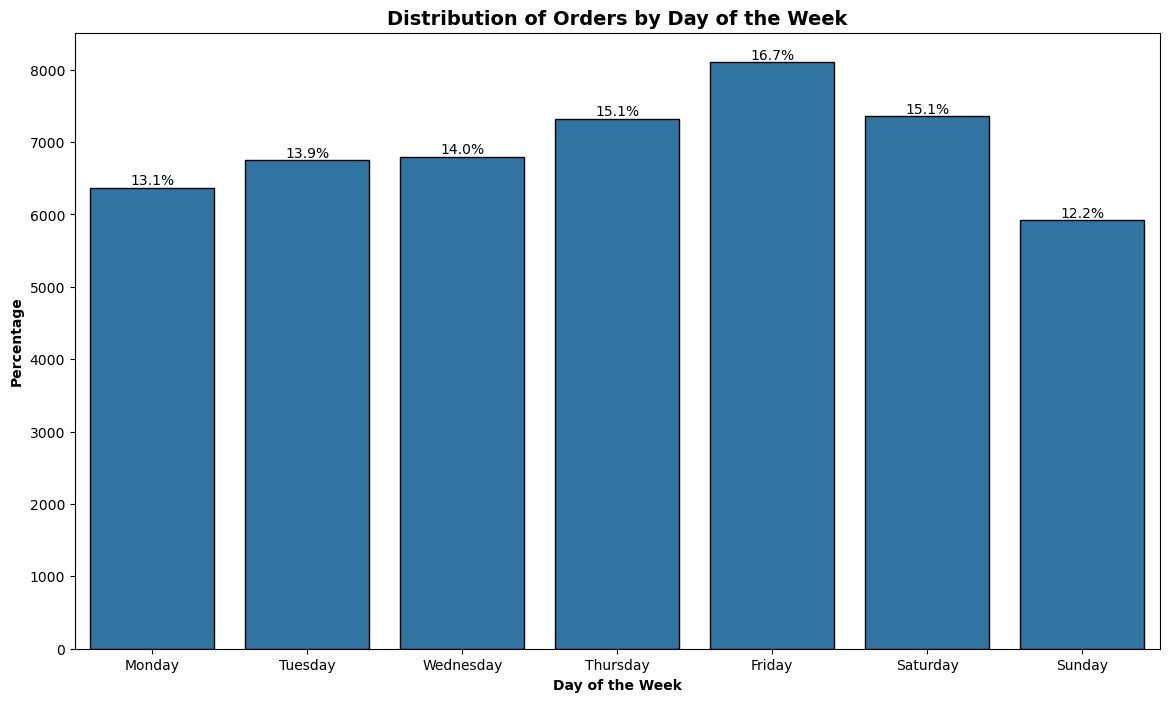

In [51]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
CountPlotsWithValues(df, xVar='day', value_type='percentage', order=day_order,
                     title='Distribution of Orders by Day of the Week',
                     x_label='Day of the Week', y_label='Percentage')

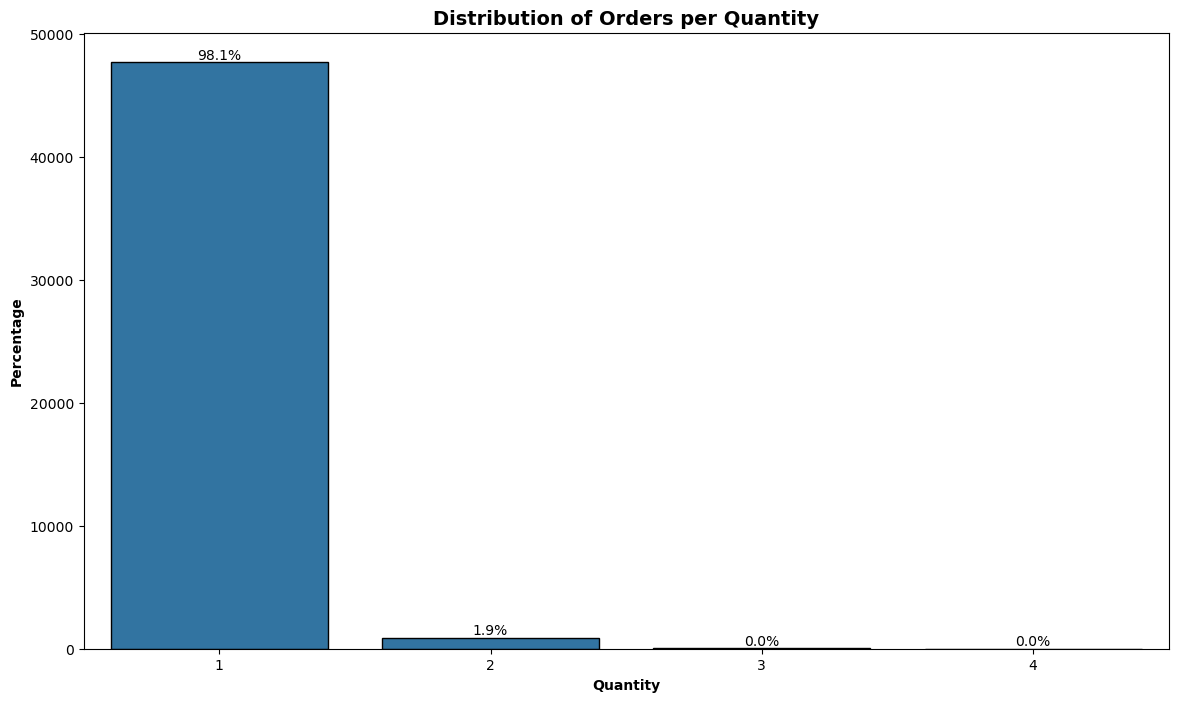

In [56]:
CountPlotsWithValues(df, xVar='quantity', value_type='percentage', title='Distribution of Orders per Quantity', x_label='Quantity', y_label='Percentage')

## Majority of the customer order 1 pizza per order

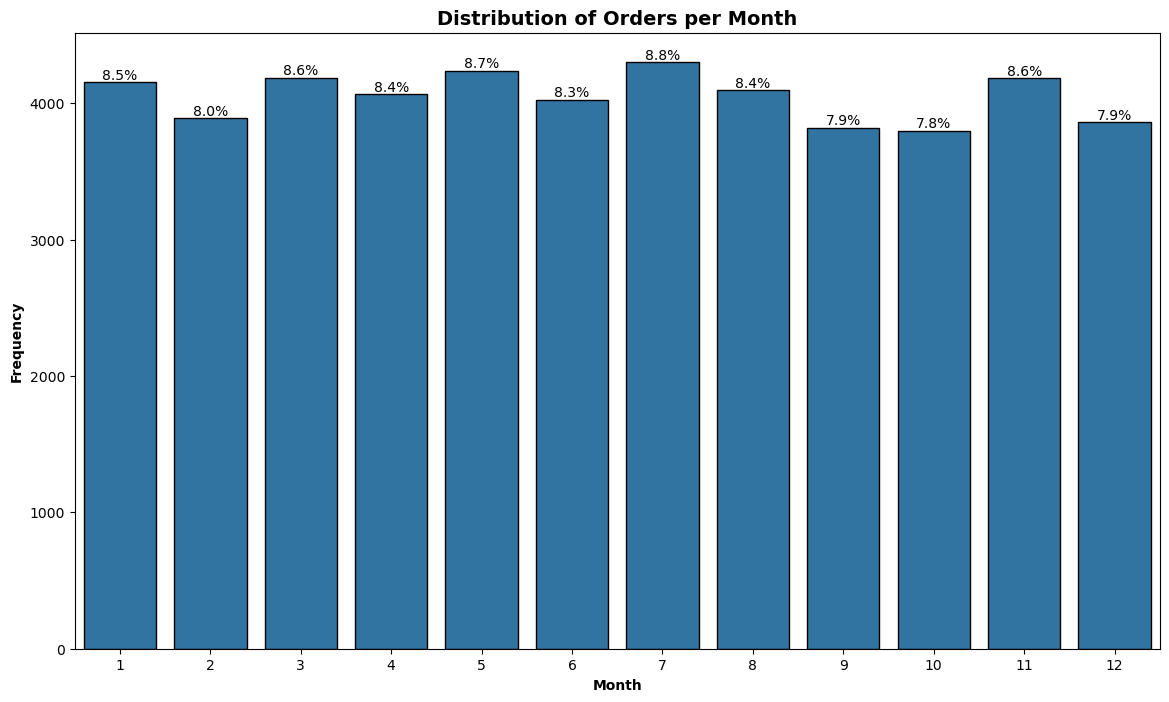

In [58]:
CountPlotsWithValues(df, xVar='month', value_type='percentage', title='Distribution of Orders per Month', x_label='Month')

## Orders seem to be evenly spread out through the year

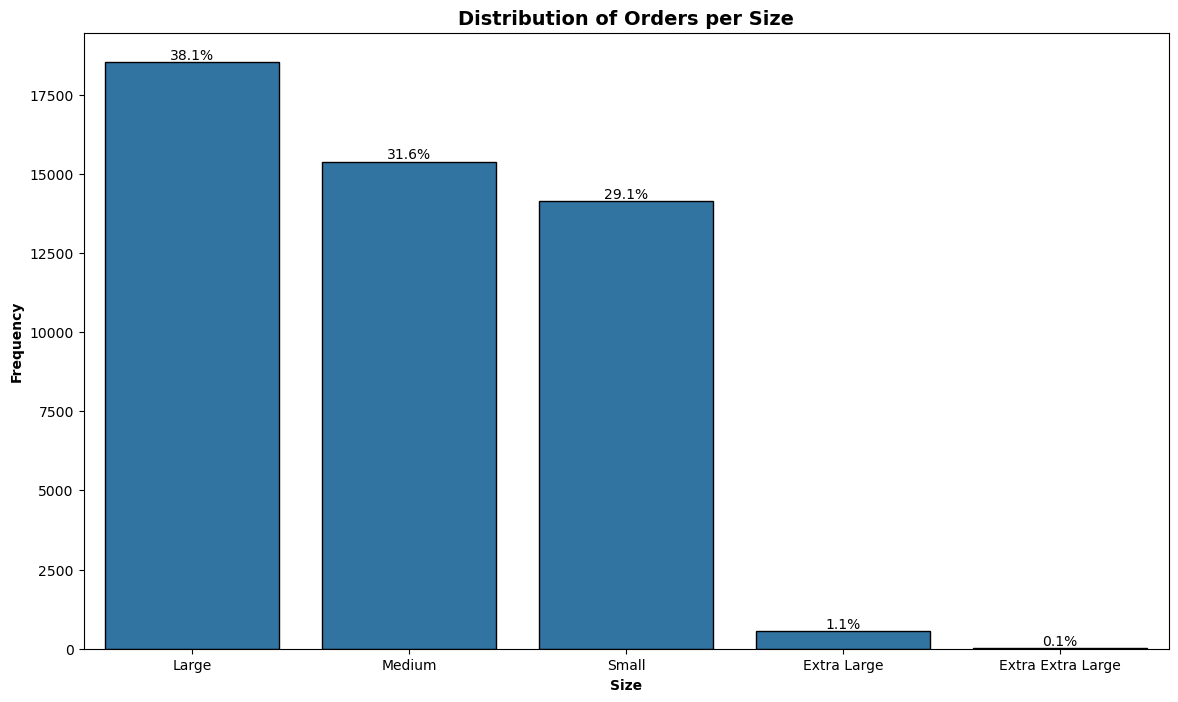

In [59]:
CountPlotsWithValues(df, xVar='size', value_type='percentage', title='Distribution of Orders per Size', x_label='Size')

## Large pizzas are most ordered followed by medium then small Extra Large and Extra Extra Large being the least ordered

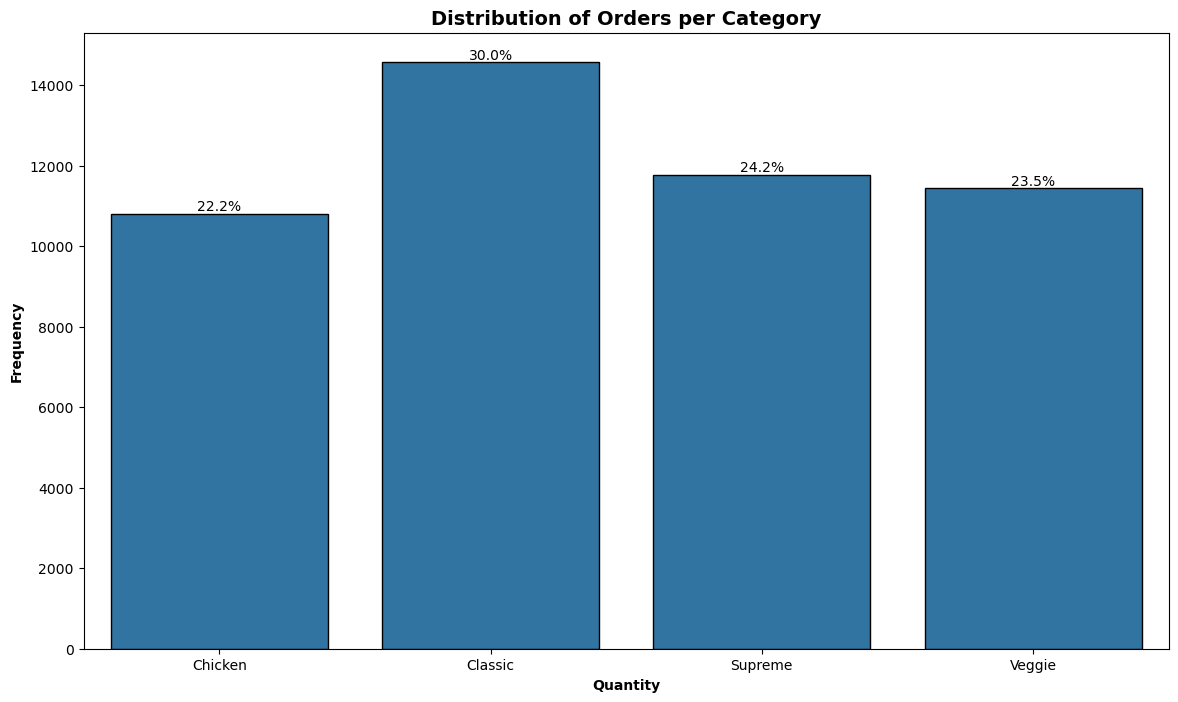

In [60]:
CountPlotsWithValues(df, xVar='category', value_type='percentage', title='Distribution of Orders per Category', x_label='Quantity')

## From the categories, Classic Pizza is the most ordered at 30% with chicken pizza being the least at 22%

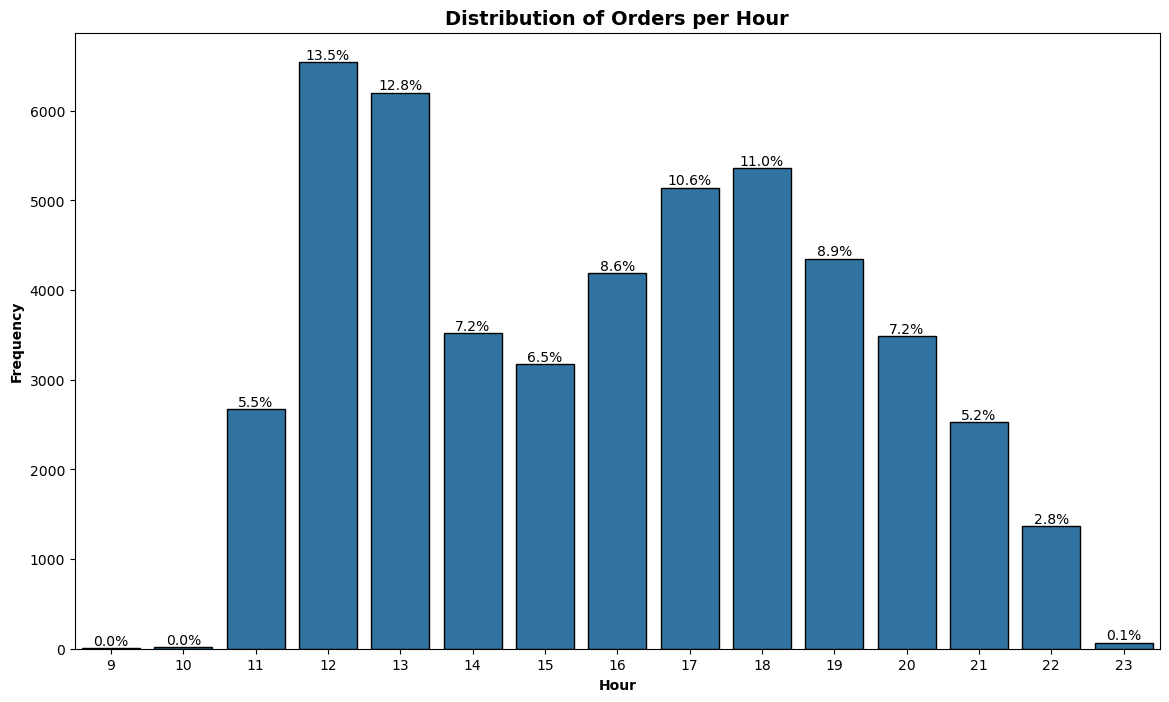

In [62]:
CountPlotsWithValues(df, xVar='hour', value_type='percentage', title='Distribution of Orders per Hour', x_label='Hour')

## From the plot above most orders come in at 12-1pm and 5-6pm.

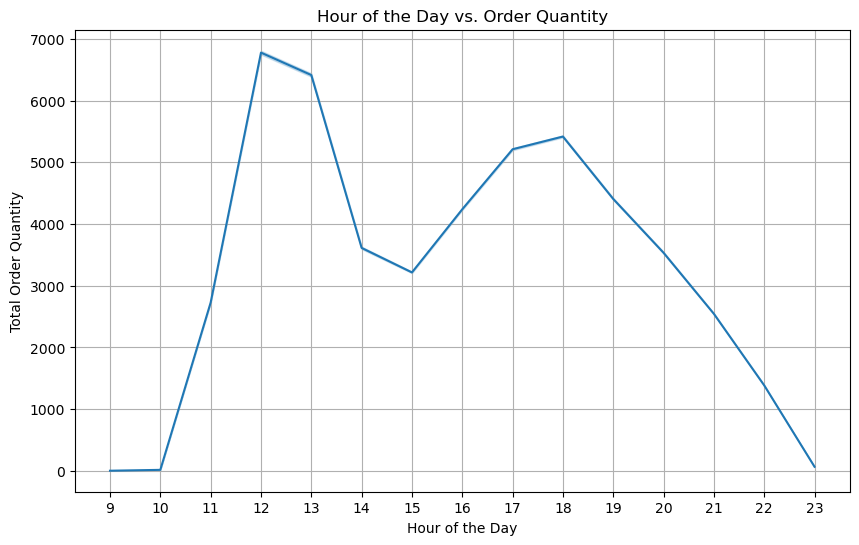

In [66]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='hour', y='quantity', estimator=sum)

# Set x-axis values to include all hours from 10 to 22
plt.xticks(range(9, 24))  # This sets tick values from 10 to 22

plt.title('Hour of the Day vs. Order Quantity')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Order Quantity')
plt.grid()
plt.show()

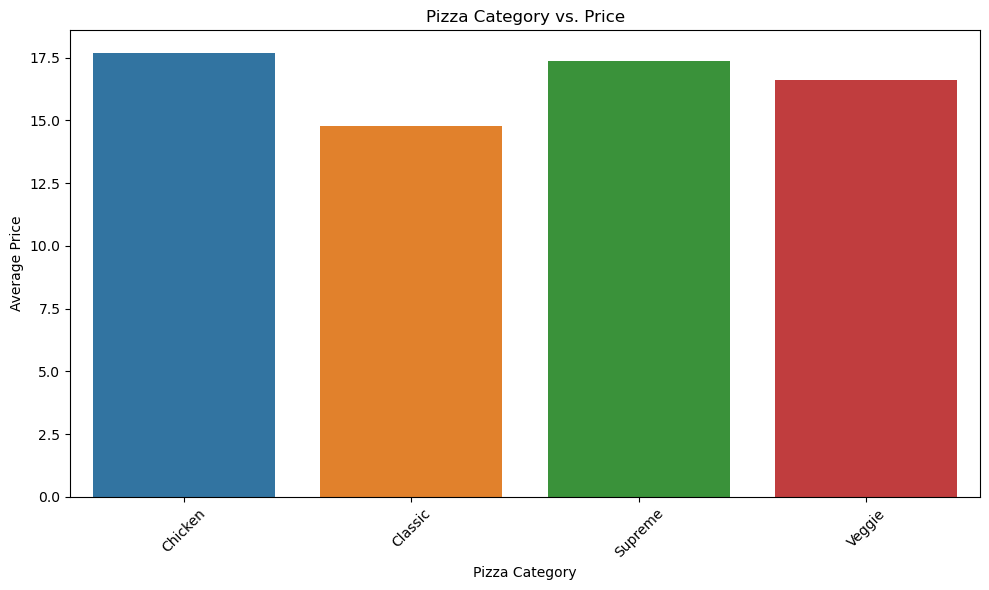

In [70]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='category', y='price', errorbar=None)
plt.title('Pizza Category vs. Price')
plt.xlabel('Pizza Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# INSIGHTS